# Continuous Distributions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set_style('whitegrid')

In [2]:
def plot_pdfcdf(dist = None, xlim = [-4,4], figsize=(4,4)):
    '''
    This function creates a figure containing two axes that plot the probability 
    density function and cumulative distribution function of a continuous distribution.
    
    Inputs:
    dist    : A parameterized distribution from scipy.stats. If omitted, will use standard normal.
    xlim    : The range of x values you want to plot. If omitted, defaults to [-4,4].
              This should be a list of 2 values of increasing value.
    figsize : Sets the figure size. Defaults to 4x4. 
              This should be a tuple of length 2.
        
    Returns:
    fig     : A figure object with two axes to further refine, display, or save.
    '''
    import scipy.stats as stats
    if dist == None:
        dist = stats.norm()
    x = np.linspace(xlim[0],xlim[1],1000)
    pdf = [dist.pdf(xx) for xx in x]
    cdf = [dist.cdf(xx) for xx in x]
    fig, ax = plt.subplots(nrows=2, figsize=figsize, sharex=True)
    ax[0].plot(x,pdf)
    ax[0].set_xlim(xlim)
    ax[0].set_ylabel(r'$f(x)$')
    ax[0].set_title('pdf')
    ax[1].plot(x,cdf)
    ax[1].set_xlim(xlim)
    ax[1].set_ylabel(r'$F(x)$')
    ax[1].set_xlabel(r'$x$')
    ax[1].set_title('cdf')
    fig.tight_layout()
    return fig

In [3]:
def plot_cdf_filled(x, dist = None, xlim = [-4,4], figsize = (4,4)):
    '''
    This function creates a figure containing two axes that plot the probability 
    density function and cumulative distribution function of a continuous distribution.
    The pdf is filled left of x to demonstrate the cdf.
    
    Inputs:
    x       : The value of the cdf you'd like to plot.
    dist    : A parameterized distribution from scipy.stats. If omitted, will use standard normal.
    xlim    : The range of x values you want to plot. If omitted, defaults to [-4,4].
              This should be a list of 2 values of increasing value.
    figsize : Sets the figure size. Defaults to 4x4. 
              This should be a tuple of length 2.
        
    Returns:
    fig     : A figure object with two axes to further refine, display, or save.
    '''
    import scipy.stats as stats
    import numpy as np
    if dist == None:
        dist = stats.norm()
    pdfx = np.linspace(xlim[0],xlim[1],1000)
    pdf = [dist.pdf(xx) for xx in pdfx]
    cdf = [dist.cdf(xx) for xx in pdfx]
    fillx = np.linspace(xlim[0],min(x,xlim[1]),1000)
    filly = [dist.pdf(xx) for xx in fillx]
    fig, ax = plt.subplots(nrows=2, figsize=figsize, sharex=True)
    ax[0].plot(pdfx,pdf)
    ax[0].fill_between(x=fillx, y1=0, y2=filly, color='C0', alpha=0.5, label=f'$F({x})={dist.cdf(x):.2f}$')
    ax[0].legend()
    ax[0].axvline(x=x, color='black', ls='--')
    ax[0].set_xlim(xlim)
    ax[0].set_ylabel(r'$f(x)$')
    ax[0].set_title('pdf')
    ax[1].plot(pdfx,cdf)
    ax[1].axvline(x=x, color='black', ls='--')
    ax[1].axhline(y=dist.cdf(x), color='black', ls='--')
    ax[1].set_xlim(xlim)
    ax[1].set_ylabel(r'$F(x)$')
    ax[1].set_xlabel(r'$x$')
    ax[1].set_title('cdf')
    fig.tight_layout()
    return fig

## Normal Family

In [4]:
mu = 5
sigma = 2
dist = stats.norm(loc=mu, scale=sigma)

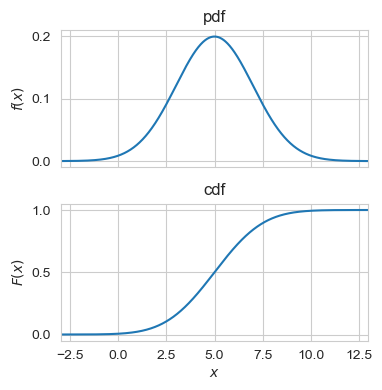

In [7]:
fig = plot_pdfcdf(dist=dist, xlim=[mu-4*sigma, mu+4*sigma])
plt.show()

In [8]:
x = 6
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.')  # Note the change from discrete
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=6 is 0.17603266338214976.
CDF at x=6 is 0.6914624612740131.
PPF at q=0.75 is 6.348979500392163.
SF at x=6 is 0.3085375387259869.
ISF at q=0.75 is 3.651020499607837.
Expectation is 5.0.
Variance is 4.0.
Median is 5.0.
A random sample of 10 values is [ 3.79958091  6.12772842  3.60607747  6.06811106  5.95749995  6.78296678
  6.68756752  1.06345117  2.71037953 11.08216848].


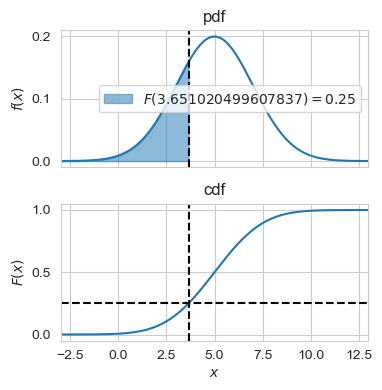

In [13]:
plot_cdf_filled(x=3.651020499607837, dist=dist, xlim=[mu-4*sigma, mu+4*sigma])
plt.show()

## Student's $t$-distribution

In [28]:
df = 10
loc = 5
scale = 2
dist = stats.t(df=df, loc=loc, scale=scale)

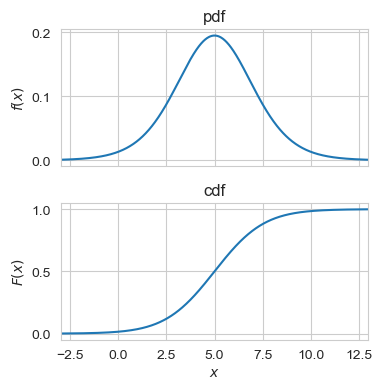

In [29]:
fig = plot_pdfcdf(dist=dist, xlim=[loc-4*scale, loc+4*scale])
plt.show()

In [27]:
dist.var()

1.25

In [21]:
x = 6
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.')  # Note the change from discrete
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=6 is 0.169847568176039.
CDF at x=6 is 0.6860531971285135.
PPF at q=0.75 is 6.399624122624858.
SF at x=6 is 0.31394680287148646.
ISF at q=0.75 is 3.600375877375142.
Expectation is 5.0.
Variance is 5.0.
Median is 5.0.
A random sample of 10 values is [0.72136455 6.06398051 3.6046181  6.50320863 1.36602282 5.4949753
 4.39628036 4.56912987 2.80999671 1.6852702 ].


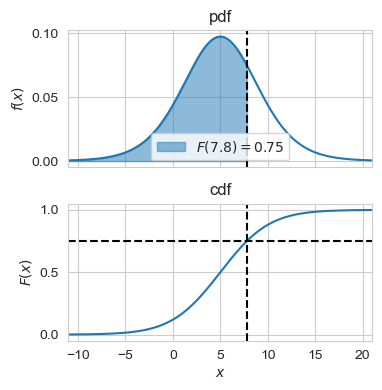

In [33]:
df = 10
loc = 5
scale = 4
dist = stats.t(df=df, loc=loc, scale=scale)
plot_cdf_filled(x=7.8, dist=dist, xlim=[loc-4*scale, loc+4*scale])
plt.show()

## Chi-Squared Distribution

In [34]:
df = 10
dist = stats.chi2(df=df)

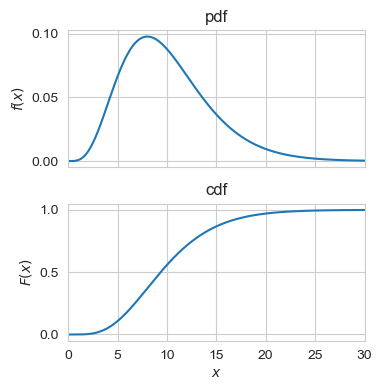

In [35]:
fig = plot_pdfcdf(dist=dist, xlim=[0,30])
plt.show()

In [36]:
x = 12
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.')  # Note the change from discrete
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=12 is 0.06692630876999169.
CDF at x=12 is 0.7149434996833688.
PPF at q=0.75 is 12.548861396889377.
SF at x=12 is 0.2850565003166312.
ISF at q=0.75 is 6.737200771954642.
Expectation is 10.000000000042053.
Variance is 20.0.
Median is 9.34181776559197.
A random sample of 10 values is [11.46665609  7.21084057 12.17672894  5.345873   15.86608997 10.84458706
  6.84329151 12.53879881  8.7645622  11.68729371].


## F Distribution

In [37]:
dfn = 5
dfd = 100
dist = stats.f(dfn=dfn, dfd=dfd)

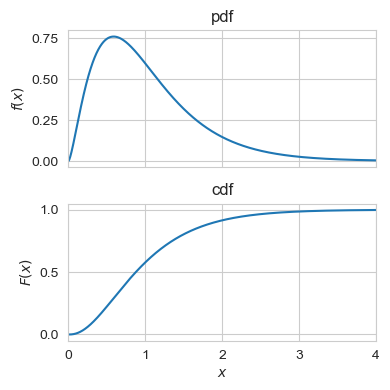

In [38]:
fig = plot_pdfcdf(dist=dist, xlim=[0,4])
plt.show()

In [39]:
x = 6
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.')  # Note the change from discrete
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=6 is 0.00011816465240631047.
CDF at x=6 is 0.9999323428014371.
PPF at q=0.75 is 1.3493373376346982.
SF at x=6 is 6.765719856299158e-05.
ISF at q=0.75 is 0.5340838822497622.
Expectation is 1.0204081632648232.
Variance is 0.44686241843676244.
Median is 0.8761990472073524.
A random sample of 10 values is [1.33871667 0.76827981 0.25771205 0.58706768 0.82197192 0.82916128
 0.70625552 0.10454321 1.15754054 1.92594157].


## Lognormal distribution





In [62]:
mu = 1
sigma = 0.5
dist = stats.lognorm(s=sigma, scale=np.exp(mu))

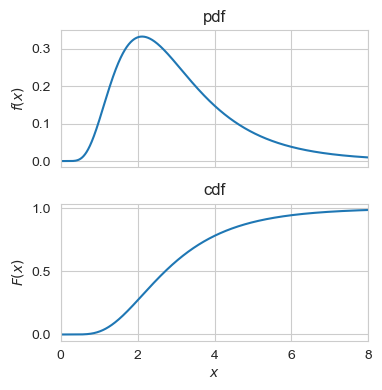

In [63]:
fig = plot_pdfcdf(dist=dist, xlim=[0,8])
plt.show()

In [64]:
x = 6
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.')  # Note the change from discrete
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=6 is 0.03795640798263049.
CDF at x=6 is 0.9433483832075547.
PPF at q=0.75 is 3.808536044832714.
SF at x=6 is 0.056651616792445326.
ISF at q=0.75 is 1.9401302789180261.
Expectation is 3.080216848918027.
Variance is 2.694758124344946.
Median is 2.718281828459045.
A random sample of 10 values is [1.52687546 4.63775067 2.26130486 1.05365263 1.24745062 1.176865
 1.8205467  2.38844417 3.17761024 8.0563717 ].


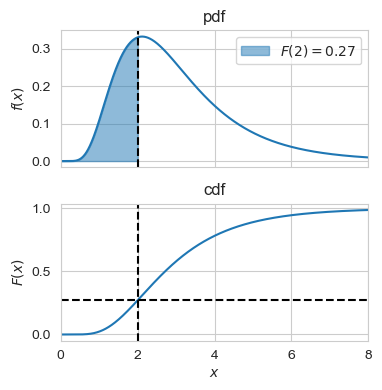

In [65]:
plot_cdf_filled(x=2, dist=dist, xlim=[0,8])
plt.show()

## Exponential Distribution

In [66]:
lamb = 3
dist = stats.expon(scale=1/lamb)

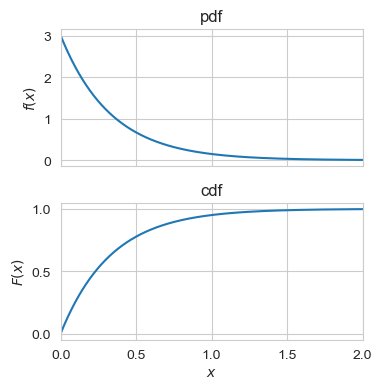

In [67]:
fig = plot_pdfcdf(dist=dist, xlim=[0,2])
plt.show()

In [68]:
x = 6
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.')  # Note the change from discrete
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=6 is 4.568993923413789e-08.
CDF at x=6 is 0.9999999847700203.
PPF at q=0.75 is 0.46209812037329684.
SF at x=6 is 1.522997974471263e-08.
ISF at q=0.75 is 0.09589402415059363.
Expectation is 0.33333333333332266.
Variance is 0.1111111111111111.
Median is 0.23104906018664842.
A random sample of 10 values is [0.12079614 0.11658567 0.19230826 0.06604241 0.07810315 0.08148698
 0.62483895 0.06279272 0.14341652 0.71795618].


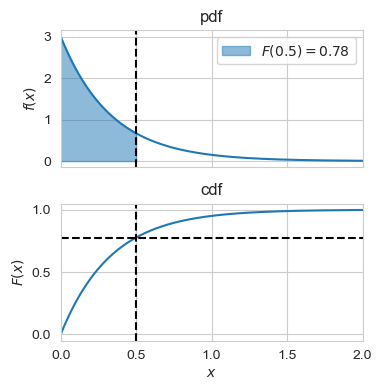

In [70]:
plot_cdf_filled(x=.5, dist=dist, xlim=[0,2])
plt.show()

## Beta Distribution

In [76]:
a = 1.5
b = 1.15
dist = stats.beta(a=a, b=b)

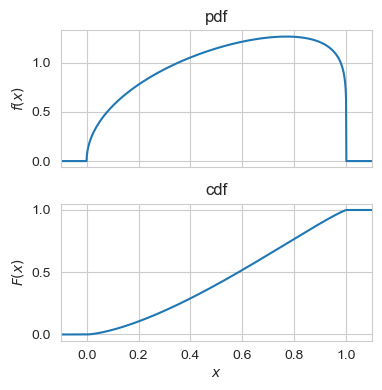

In [77]:
fig = plot_pdfcdf(dist=dist, xlim=[-0.1,1.1])
plt.show()

In [78]:
x = 6
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.')  # Note the change from discrete
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=6 is 0.0.
CDF at x=6 is 1.0.
PPF at q=0.75 is 0.7855576523108267.
SF at x=6 is 0.0.
ISF at q=0.75 is 0.36084812814109263.
Expectation is 0.5660377358444341.
Variance is 0.06729836094354252.
Median is 0.5847079352418073.
A random sample of 10 values is [0.07469547 0.12583716 0.77645451 0.82410467 0.71842923 0.37978477
 0.92140286 0.22907994 0.66235978 0.02350444].


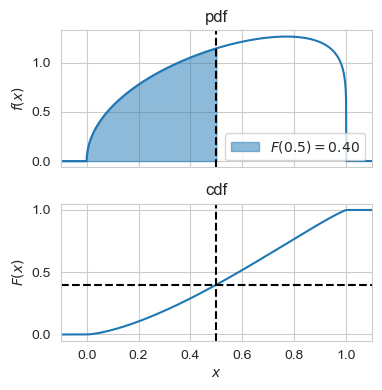

In [81]:
plot_cdf_filled(x=.5, dist=dist, xlim=[-0.1,1.1])
plt.show()

## Uniform Distribution

In [82]:
a = 1
b = 5
dist = stats.uniform(loc=a, scale=b-a)

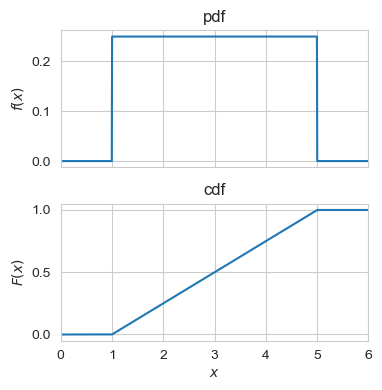

In [84]:
fig = plot_pdfcdf(dist=dist, xlim=[a-1,b+1])
plt.show()

In [85]:
x = 6
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.')  # Note the change from discrete
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=6 is 0.0.
CDF at x=6 is 1.0.
PPF at q=0.75 is 4.0.
SF at x=6 is 0.0.
ISF at q=0.75 is 2.0.
Expectation is 3.0.
Variance is 1.3333333333333333.
Median is 3.0.
A random sample of 10 values is [1.4113377  1.21515441 3.42608554 2.43244417 1.15784576 4.5606219
 1.83779203 4.21690253 4.27716506 3.29633248].


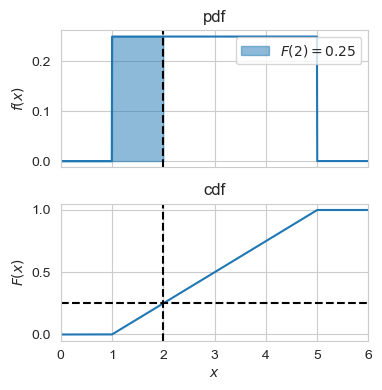

In [86]:
plot_cdf_filled(x=2, dist=dist, xlim=[a-1,b+1])
plt.show()

In [88]:
stats.norm.ppf(stats.uniform.rvs())

1.0486237991352172

---
# Progress Checks

In [54]:
mu_a = 500
mu_b = 450
sigma = 100
dist_a = stats.norm(loc=mu_a, scale=sigma)
dist_b = stats.norm(loc=mu_b, scale=sigma)

In [56]:
dist_b.cdf(400)

0.3085375387259869

In [57]:
dist_b.sf(400)

0.6914624612740131

In [58]:
dist_a.sf(400)

0.8413447460685429

In [59]:
(dist_a.sf(400) + dist_b.sf(400)) / 2

0.766403603671278

In [60]:
p_a = 0.5
p_b = 0.5
req_score = 400
p_s_b = dist_b.sf(req_score)
p_s_a = dist_a.sf(req_score)


In [61]:
p_b_s = p_b * p_s_b / ((p_b * p_s_b) + (p_a * p_s_a))
p_b_s

0.45110856600994775